# BigMart Sales Prediction

### Author: Naveen Roy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Train Data

In [2]:
data=pd.read_csv(r"C:\Users\navee\Desktop\Train.csv")

In [3]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Checking for Null values and removing it

In [4]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
data.loc[:,"Item_Weight"].median()
data["Item_Weight"]=data["Item_Weight"].fillna(12.6)

In [6]:
data.loc[:,"Outlet_Size"].mode()
data["Outlet_Size"]=data["Outlet_Size"].fillna('Medium')

In [7]:
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace(["LF","reg"],['Low Fat','Regular'])

In [8]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
data=data.drop(["Item_Identifier","Outlet_Identifier"],axis=1)

In [10]:
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Visualization

## Number of Outlet types

<AxesSubplot:>

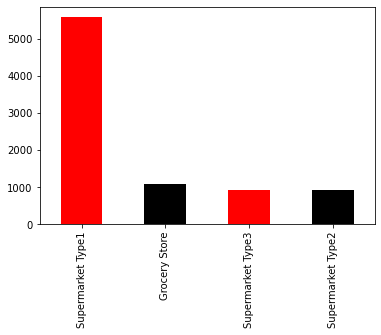

In [11]:
data['Outlet_Type'].value_counts().plot.bar(color=['r','black'])

## Total number of items 

<AxesSubplot:>

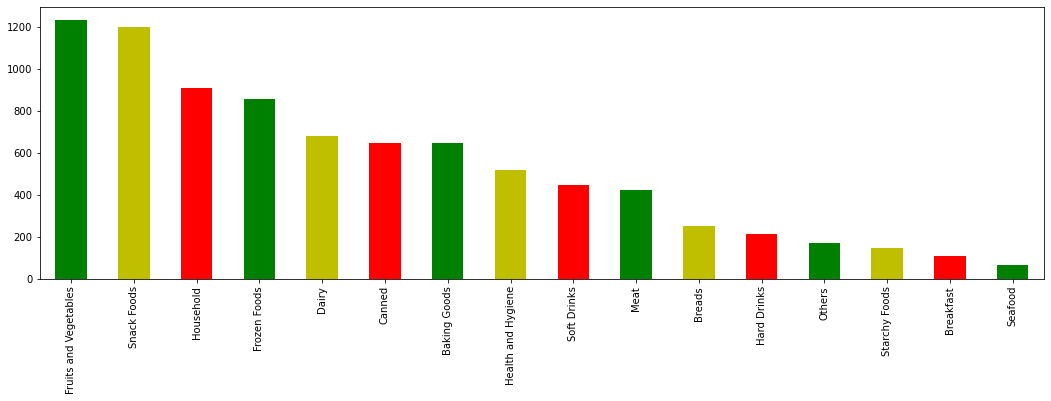

In [12]:
plt.figure(figsize=(18,5))
data['Item_Type'].value_counts().plot.bar(color=['g','y','r'])

## Items which sold more

Text(0, 0.5, 'Item Name')

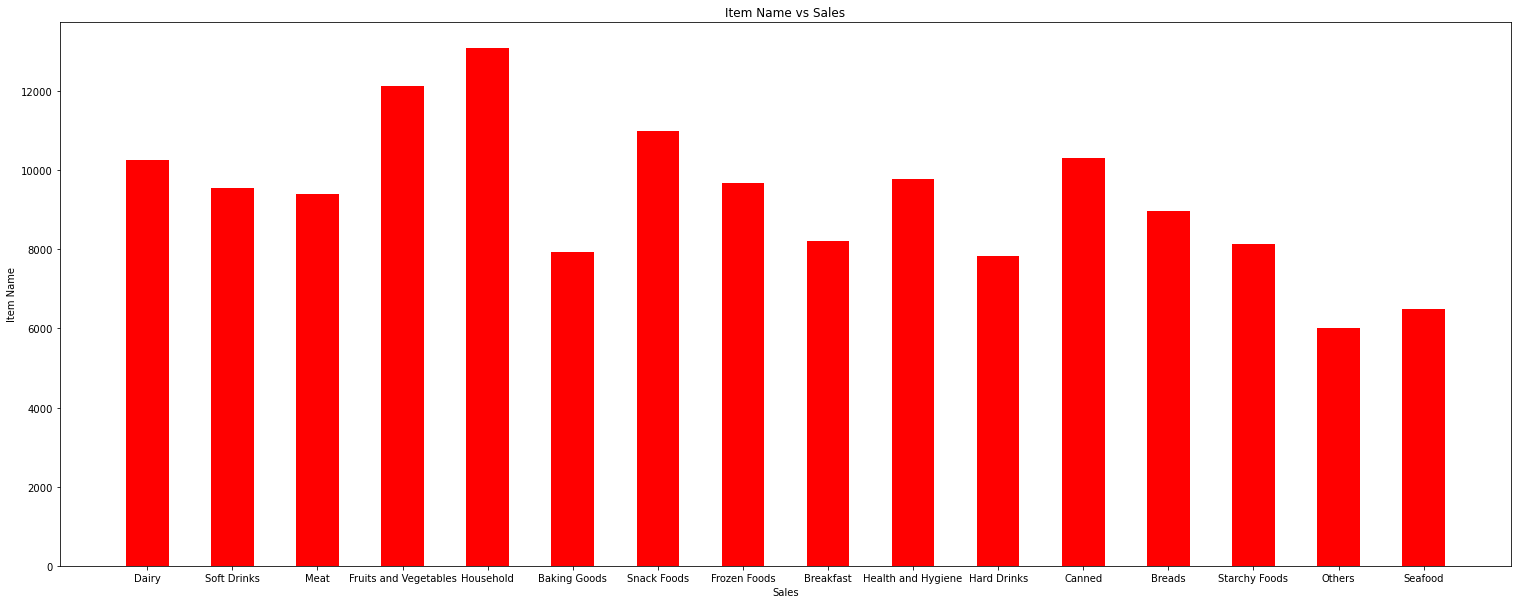

In [13]:
x=data["Item_Type"]
y=data["Item_Outlet_Sales"]
plt.figure(figsize=(26,10)) 
plt.bar(x,y,color= 'red',width=0.5,data=data)
plt.title("Item Name vs Sales")
plt.xlabel("Sales")
plt.ylabel("Item Name")

## Which outlet contributed more sales

Text(0, 0.5, 'Sales')

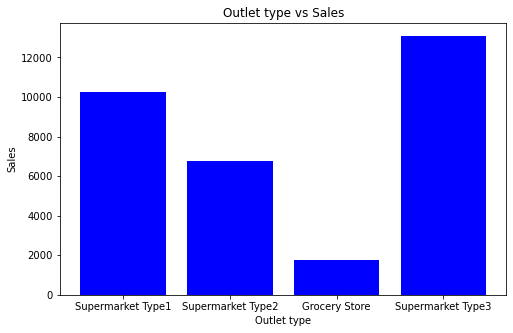

In [14]:
plt.figure(figsize=(8,5))
plt.bar(data["Outlet_Type"],data["Item_Outlet_Sales"],color='b')
plt.title("Outlet type vs Sales")
plt.xlabel("Outlet type")
plt.ylabel("Sales")

## Converting Categorical to Numerical using One-Hot Encoding

In [15]:
data = pd.get_dummies(data, columns =['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type'])
data.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Fat_Content_low fat             uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_S

In [16]:
data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


## Finding Correlation 

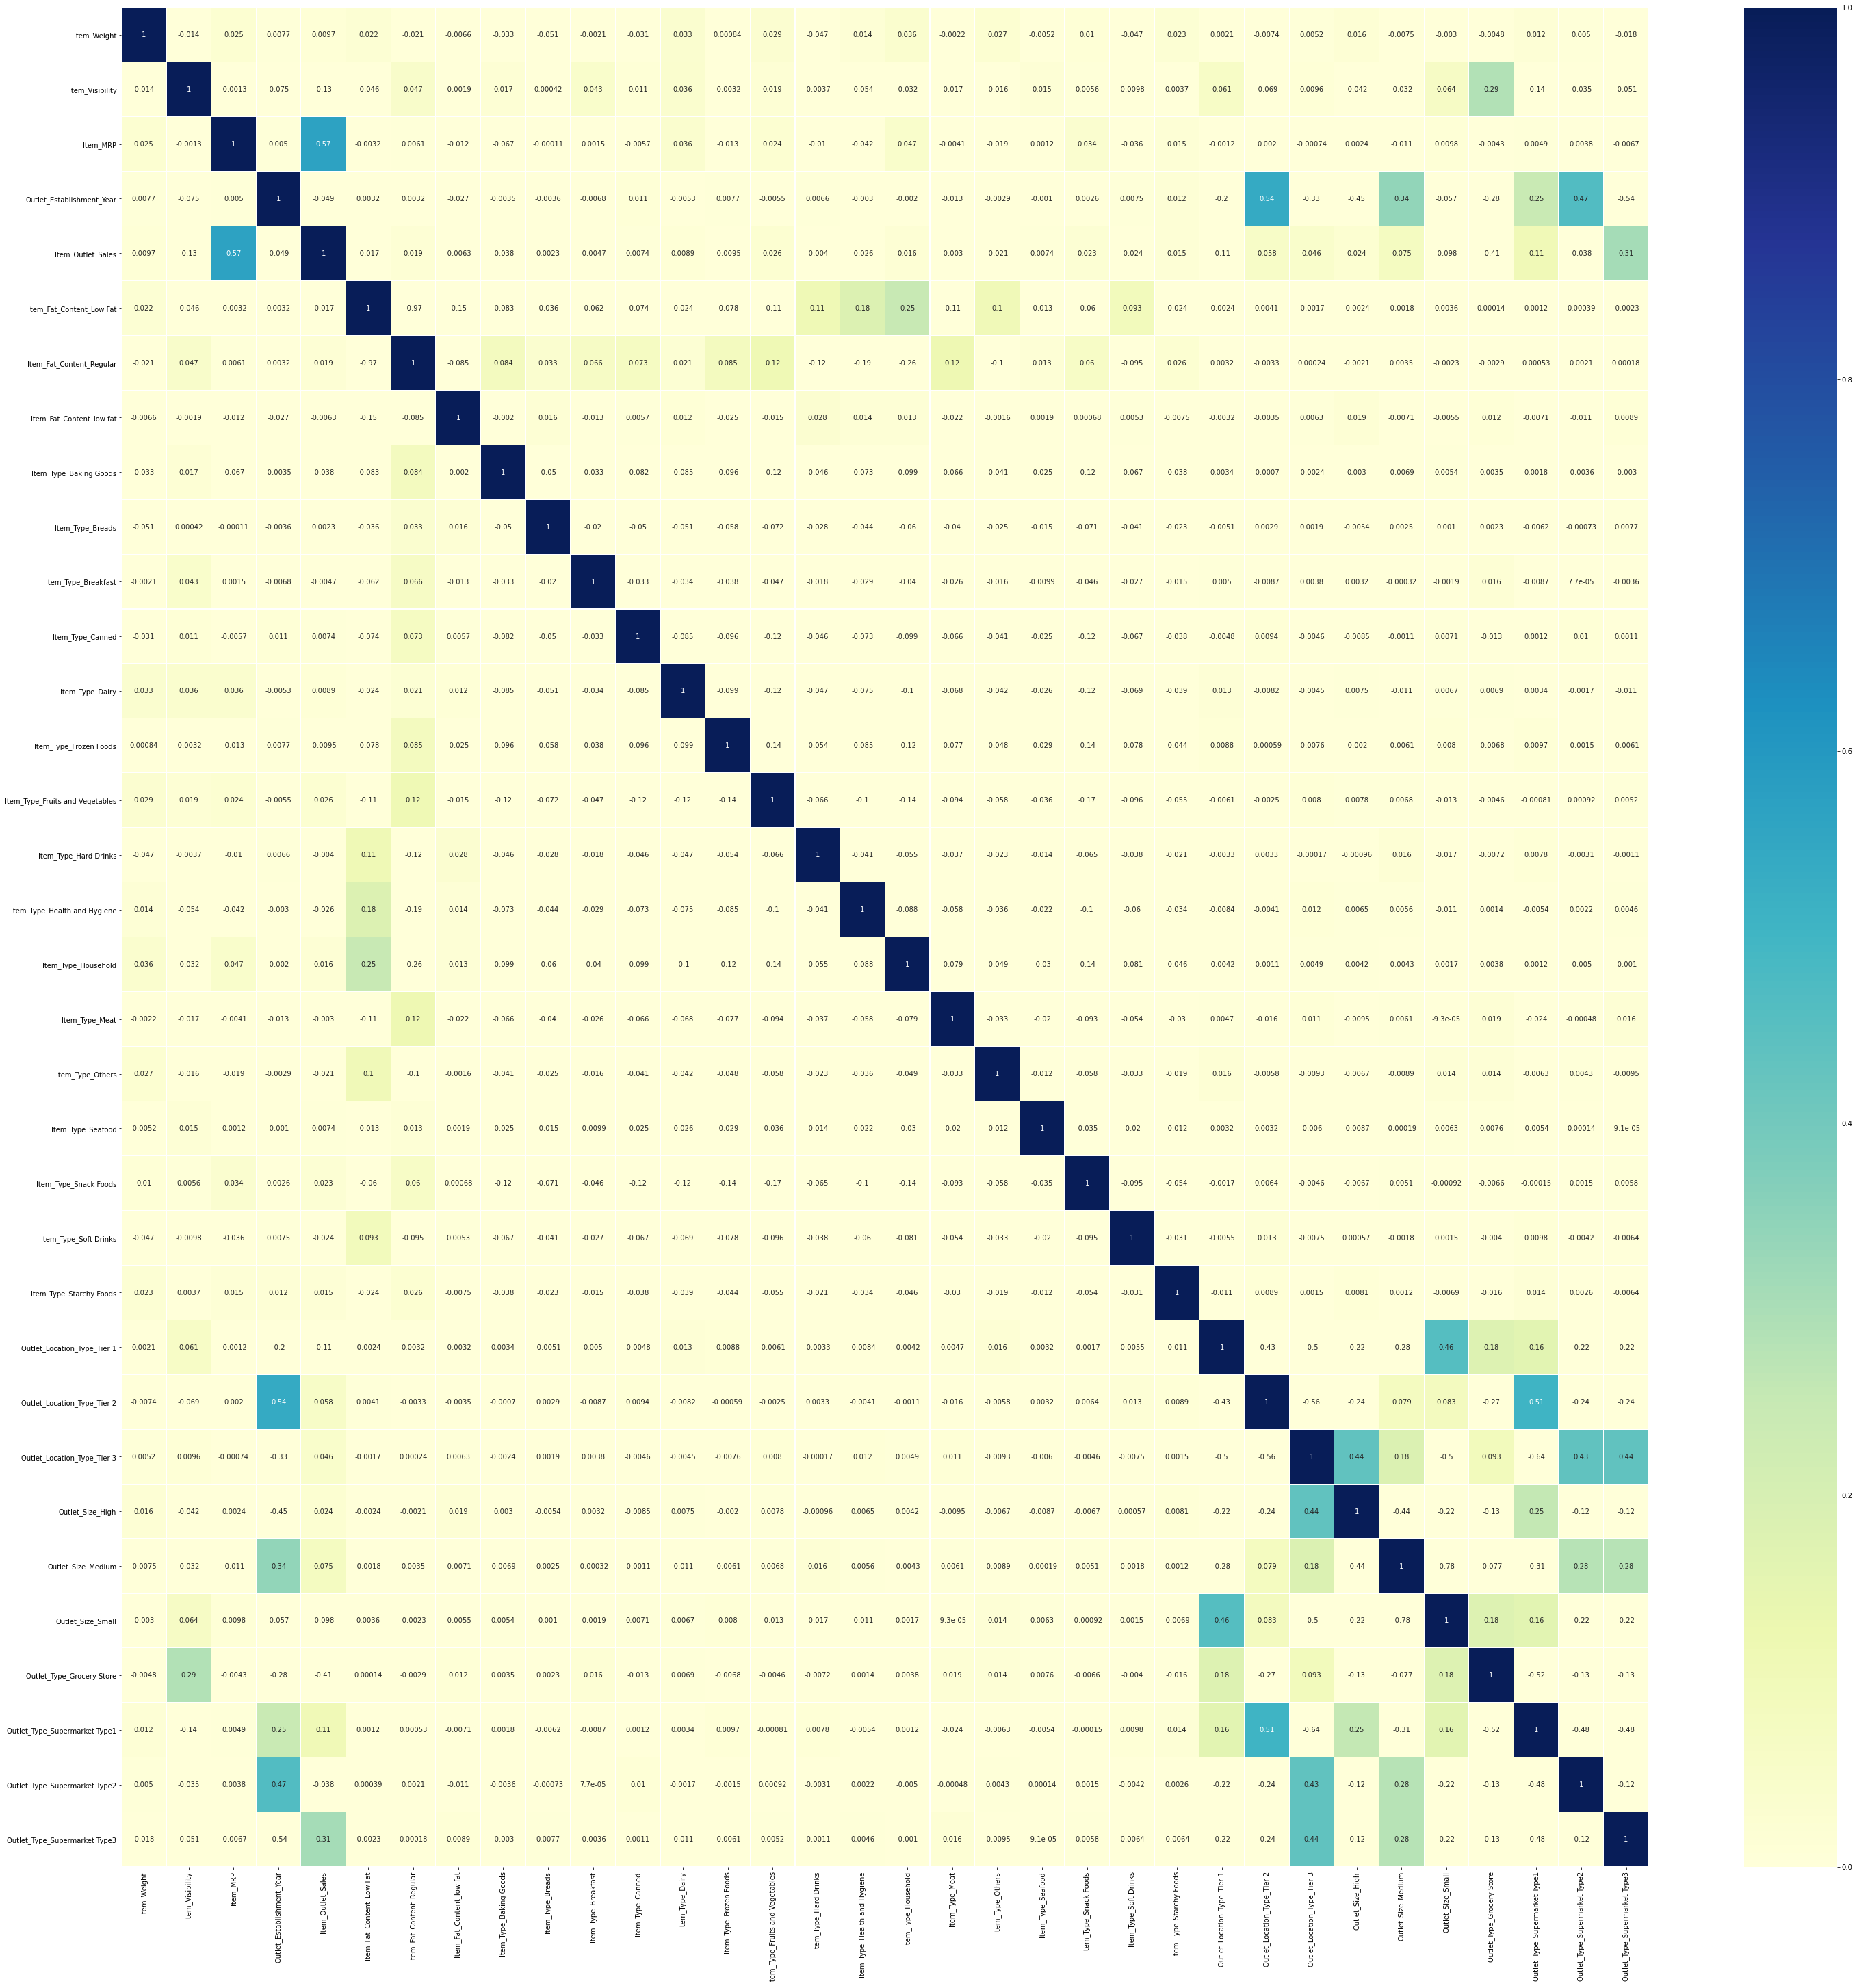

In [17]:
corr=data.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr,annot=True,vmin=0,vmax=1,cmap='YlGnBu',linewidth=0.1,)
plt.show()

## Arranging most correlated parameters for sales in Desending order

In [18]:
corr["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales                  1.000000
Item_MRP                           0.567574
Outlet_Type_Supermarket Type3      0.311192
Outlet_Type_Supermarket Type1      0.108765
Outlet_Size_Medium                 0.075154
Outlet_Location_Type_Tier 2        0.058261
Outlet_Location_Type_Tier 3        0.046376
Item_Type_Fruits and Vegetables    0.025950
Outlet_Size_High                   0.024170
Item_Type_Snack Foods              0.022782
Item_Fat_Content_Regular           0.018719
Item_Type_Household                0.015701
Item_Type_Starchy Foods            0.015039
Item_Weight                        0.009693
Item_Type_Dairy                    0.008858
Item_Type_Canned                   0.007387
Item_Type_Seafood                  0.007380
Item_Type_Breads                   0.002332
Item_Type_Meat                    -0.002995
Item_Type_Hard Drinks             -0.003956
Item_Type_Breakfast               -0.004656
Item_Fat_Content_low fat          -0.006326
Item_Type_Frozen Foods          

## Splitting to x and y data for modelling

In [19]:
x=data.drop(["Item_Outlet_Sales"],axis=1)
y=data["Item_Outlet_Sales"]

## Training Testing Splitting the data using train_test_split() function

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

## Model Building With Hypertuning using GridSearchCV
### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

In [23]:
mse=mean_squared_error(y_test,lr_pred)
rmse1=math.sqrt(mse)
r2_score1=r2_score(y_test,lr_pred)
print("R2 Score is",r2_score1,"\nRMSE is",rmse1)

R2 Score is 0.5673625015337177 
RMSE is 1131.2146448579936


### Ridge Regression

In [24]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.05)
rr.fit(x_train,y_train)
rr_pred=rr.predict(x_test)

In [25]:
mse=mean_squared_error(y_test,rr_pred)
rmse2=math.sqrt(mse)
r2_score2=r2_score(y_test,rr_pred)
print("R2 Score is",r2_score2,"\nRMSE is",rmse2)

R2 Score is 0.5673038793240313 
RMSE is 1131.2912818301793


### Lasso Regression

In [26]:
from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.05)
ll.fit(x_train,y_train)
ll_pred=ll.predict(x_test)

In [27]:
mse=mean_squared_error(y_test,ll_pred)
rmse3=math.sqrt(mse)
r2_score3=r2_score(y_test,ll_pred)
print("R2 Score is",r2_score3,"\nRMSE is",rmse3)

R2 Score is 0.5672619384756299 
RMSE is 1131.3461080282675


### Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor

### Hypertuning on RandomForrestRegression using GridSearchCV

In [29]:
parameter= { 'n_estimators': [200, 500],'max_features': ['auto', 'sqrt'],'max_depth' : [4,5,6]}
rfr=GridSearchCV(RandomForestRegressor(),parameter)
rfr.fit(x_train,y_train)
rfr.best_params_

{'max_depth': 6, 'max_features': 'auto', 'n_estimators': 500}

In [30]:
rfr=RandomForestRegressor(max_depth=5,max_features='auto',n_estimators=200)
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)

In [31]:
mse=mean_squared_error(y_test,rfr_pred)
rmse4=math.sqrt(mse)
r2_score4=r2_score(y_test,rfr_pred)
print("R2 Score is",r2_score4,"\nRMSE is",rmse4)

R2 Score is 0.5974155011235434 
RMSE is 1091.2178560465757


### XG Boost Regression

In [32]:
from xgboost import XGBRegressor

### Hypertuning using GridSearch CV on XG Boost

In [33]:
parameters={"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],"n_estimators":[10]}
xgbr = GridSearchCV(XGBRegressor(),parameters)
xgbr.fit(x_train,y_train)
xgbr.best_params_

{'learning_rate': 0.2, 'n_estimators': 10}

In [34]:
xgbr=XGBRegressor(learning_rate=0.2,n_estimators=10)
xgbr.fit(x_train,y_train)
xgbr_pred=xgbr.predict(x_test)

In [35]:
mse=mean_squared_error(y_test,xgbr_pred)
rmse5=math.sqrt(mse)
r2_score5=r2_score(y_test,xgbr_pred)
print("R2 Score is",r2_score5,"\nRMSE is",rmse5)

R2 Score is 0.5744241556381603 
RMSE is 1121.9446300656873


### Gradient Boosting Regression

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

### Hypertuning using GridSearch CV on Gradient Boosting

In [37]:
parameters={"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],"n_estimators":[10]}
gbr = GridSearchCV(GradientBoostingRegressor(),parameters)
gbr.fit(x_train,y_train)
gbr.best_params_

{'learning_rate': 0.2, 'n_estimators': 10}

In [38]:
gbr=GradientBoostingRegressor(learning_rate=0.2,n_estimators=10)
gbr.fit(x_train,y_train)
gbr_pred=gbr.predict(x_test)

In [39]:
mse=mean_squared_error(y_test,gbr_pred)
rmse6=math.sqrt(mse)
r2_score6=r2_score(y_test,gbr_pred)
print("R2 Score is",r2_score6,"\nRMSE is",rmse6)

R2 Score is 0.5894738050553217 
RMSE is 1101.9284004637693


## Results

#### We found that Gradient Boosting gives more accuracy in prediction. RMSE is low and R2 score is high for GBR so we pick GBR for this project

In [40]:
result=pd.DataFrame({'Models':["LinearRegression","Ridge","Lasso","RandomForestRegressor","XGBRegressor","GradientBoostRegressor"],"R2 Score":[r2_score1,r2_score2,r2_score3,r2_score4,r2_score5,r2_score6],"RMSE":[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6]})
result

,Models,R2 Score,RMSE
0,LinearRegression,0.567363,1131.214645
1,Ridge,0.567304,1131.291282
2,Lasso,0.567262,1131.346108
3,RandomForestRegressor,0.597416,1091.217856
4,XGBRegressor,0.574424,1121.944630
5,GradientBoostRegressor,0.589474,1101.928400


## Whole train data Prediction  using GBR model

In [41]:
output=gbr.predict(x)
sales=pd.DataFrame({"Sales Actual":y,"Sales Predicted":output})
sales

,Sales Actual,Sales Predicted
0,3735.1380,3604.875703
1,443.4228,920.596518
2,2097.2700,2188.693119
3,732.3800,690.708592
4,994.7052,1059.022290
...,...,...
8518,2778.3834,3348.719551
8519,549.2850,1663.614029
8520,1193.1136,1534.886192
8521,1845.5976,1571.612785


## importing Test data

In [42]:
data2=pd.read_csv(r"C:\Users\navee\Desktop\Test.csv")
data2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


## Data Cleaning on Test data

In [43]:
data2.loc[:,"Item_Weight"].median()
data2["Item_Weight"]=data2["Item_Weight"].fillna(12.6)
data2.loc[:,"Outlet_Size"].mode()
data2["Outlet_Size"]=data2["Outlet_Size"].fillna('Medium')

In [44]:
data2["Item_Fat_Content"]=data2["Item_Fat_Content"].replace(["LF","reg"],['Low Fat','Regular'])

In [45]:
data2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


## Converting Categorical to Numerical using One-Hot Encoding

In [46]:
data3 = pd.get_dummies(data2, columns =['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type'])
data3.dtypes

Item_Identifier                     object
Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Identifier                   object
Outlet_Establishment_Year            int64
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Fat_Content_low fat             uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_S

In [47]:
data3

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Type_Baking Goods,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDW58,20.750,0.007565,107.8622,OUT049,1999,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,FDW14,8.300,0.038428,87.3198,OUT017,2007,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
2,NCN55,14.600,0.099575,241.7538,OUT010,1998,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3,FDQ58,7.315,0.015388,155.0340,OUT017,2007,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,FDY38,12.600,0.118599,234.2300,OUT027,1985,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,0.013496,141.3154,OUT046,1997,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
5677,FDD47,7.600,0.142991,169.1448,OUT018,2009,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5678,NCO17,10.000,0.073529,118.7440,OUT045,2002,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
5679,FDJ26,15.300,0.000000,214.6218,OUT017,2007,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


## Getting test dataset ready for modelling

In [49]:
x1=data3.drop(["Item_Identifier","Outlet_Identifier"],axis=1)

### Im using the above trained model(GradientBoosting) for predicting the sales values in test dataset

In [50]:
output2=gbr.predict(x1)
output2

array([1663.61402861, 1534.88619188,  745.08416473, ..., 1937.60358888,
       3348.71955053, 1339.24509915])

## Prediction of sales on test data

In [51]:
data2["Sales"]=pd.DataFrame({"Sales Predicted":output2})
print(data2["Sales"])

0       1663.614029
1       1534.886192
2        745.084165
3       2441.439508
4       5487.329909
           ...     
5676    2188.693119
5677    2514.674303
5678    1937.603589
5679    3348.719551
5680    1339.245099
Name: Sales, Length: 5681, dtype: float64


## Exporting to CSV file 

In [52]:
data2.to_csv(r"C:\Users\navee\Desktop\output.csv")